### 소프트맥스 회귀 실습

- 붓꽃 데이터는 

    -  https://www.kaggle.com/saurabh00007/iriscsv

- Species는 Irist-setosa, Iris-Versicolor, Iris-Virginica라는 3개의 품종

- 샘플 데이터 4개의 특성으로부터 3개 중 어떤 품종인지 예측하는 문제

### 데이터 다운 및 전처리

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

- urllib.request.urlretrieve을 통한 데이터 다운

In [20]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

data = pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수 :', len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


- print문에서 '\n' 단어 사이에 추가하는 방법 대신 sep='\n'을 쓸 수 있구나.

In [21]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")
print("품종 종류:", data["Species"].unique())

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
품종 종류: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


- 3개의 품종이 4개의 특성에 대해 어떤 분포를 가지고 있는지 확인

- seaborn의 pairplot은 데이터프레임을 입력으로 받아

    - 데이터 프레임의 각 열의 조합에 따라서 산점도를 그림

- SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm 총 4개의 특성, 총 16가지 

    - 동일한 특성의 쌍일경우 히스토그렘으로 나타냄

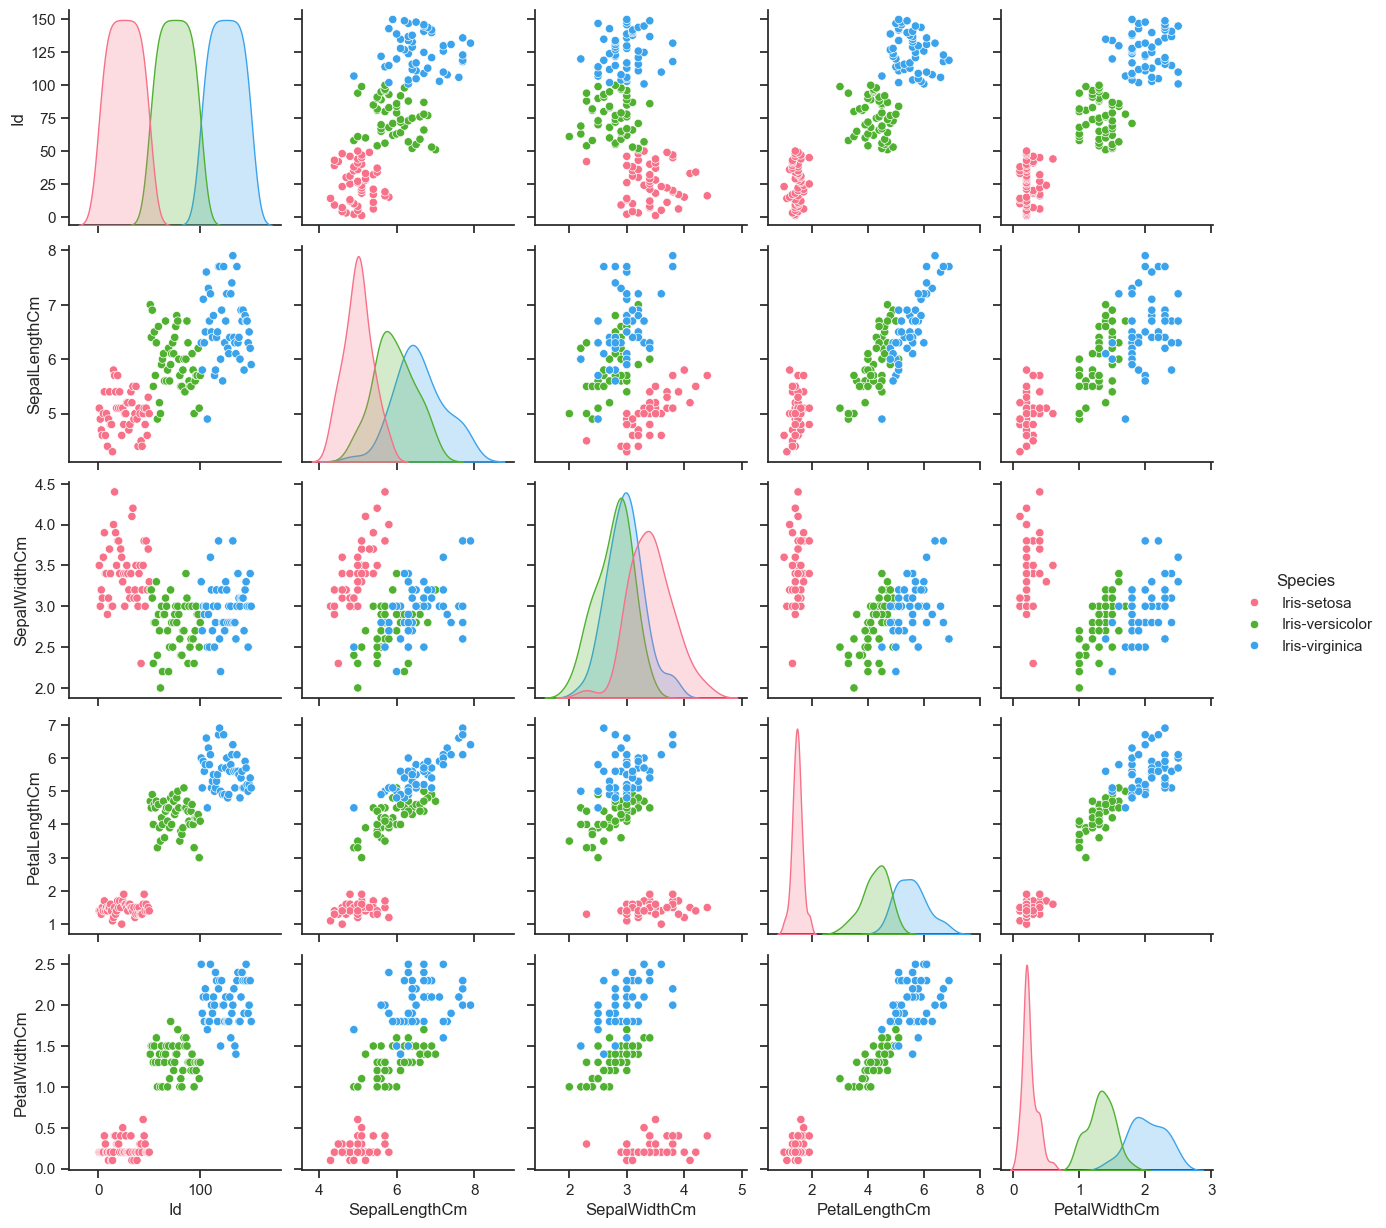

In [4]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

- 각 종과 특성에 대한 연관 관계

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

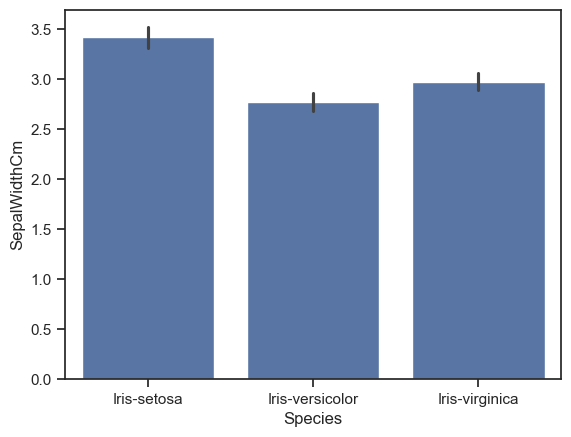

In [24]:
sns.barplot(x='Species', y='SepalWidthCm', data=data)

- 150개 중에서 Species열에서 각 품종이 몇개씩 있는지 확인

<Axes: xlabel='Species'>

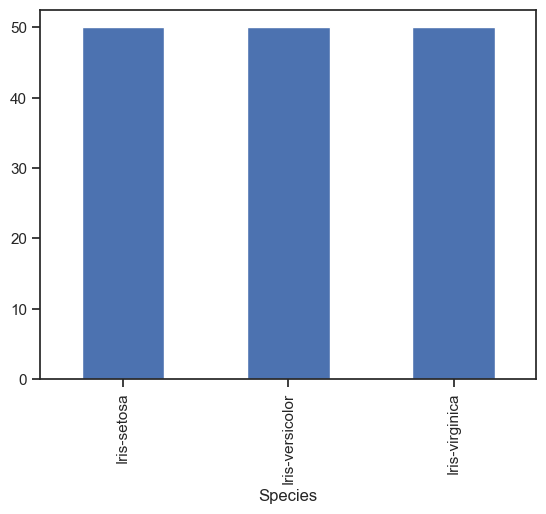

In [23]:
data['Species'].value_counts().plot(kind='bar')

- Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2로 치환

- 잘 치환 되었는지 확인

<Axes: xlabel='Species'>

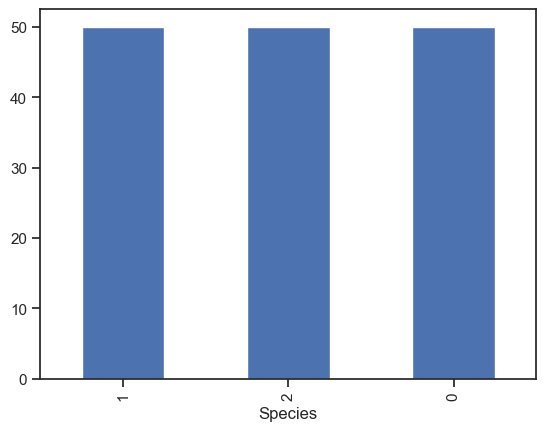

In [26]:
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [9]:
# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


- 훈련 데이터와 테스트 데이터를 분리

- 원 핫 인코딩 진행 

In [10]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


- 위의 과정까지 전처리 단계 끝!

### 소프트맥스 회귀

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- 입력 차원이 4차원이므로, input_dim = 4

- 출력 차원은 3차원이므로, input_dim의 앞의 인자값이 3

- 활성화 함수는 softmax임으로 activation = 'softmax'

- 오차 함수로는 크로스 엔트로피 함수를 사용 

- 옵티마이저로는 경사 하강법의 일종인 아담(adam)을 사용, 추후 딥러닝에서 다시 설명

- 전체 데이터 훈련 횟수(epochs)는 200번, 

- 테스트 데이터를 별도로 분리해서 평가에 사용

    - validation_data()에 테스트 데이터를 기재해주면 실제로는 훈련에는 사용하지 않으면서

    - 각 훈련 횟수마다 테스트 데이터에 대한 정확도를 출력

    - 정확도가 전체 데이터에 대한 훈련 1회(1epoch)마다 측정되지만

    - 기계는 해당 데이터를 가지고 가중치를 업데이트 하지 x

In [12]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 0s 1ms/step - loss: 3.0657 - accuracy: 0.3667 - val_loss: 3.0544 - val_accuracy: 0.2000
Epoch 2/200
120/120 [==============================] - 0s 819us/step - loss: 2.1969 - accuracy: 0.3167 - val_loss: 2.1348 - val_accuracy: 0.1667
Epoch 3/200
120/120 [==============================] - 0s 699us/step - loss: 1.7517 - accuracy: 0.1750 - val_loss: 1.6766 - val_accuracy: 0.0667
Epoch 4/200
120/120 [==============================] - 0s 690us/step - loss: 1.4920 - accuracy: 0.0833 - val_loss: 1.4312 - val_accuracy: 0.0667
Epoch 5/200
120/120 [==============================] - 0s 675us/step - loss: 1.3324 - accuracy: 0.0833 - val_loss: 1.2641 - val_accuracy: 0.1000
Epoch 6/200
120/120 [==============================] - 0s 683us/step - loss: 1.2266 - accuracy: 0.1333 - val_loss: 1.1716 - val_accuracy: 0.1000
Epoch 7/200
120/120 [==============================] - 0s 692us/step - loss: 1.1489 - accuracy: 0.0583 - val_loss: 1.1012 - val_accu

- accuracy: 훈련 데이터에 대한 정확도

- val_accuracy: 테스트 데이터에 대한 정확도

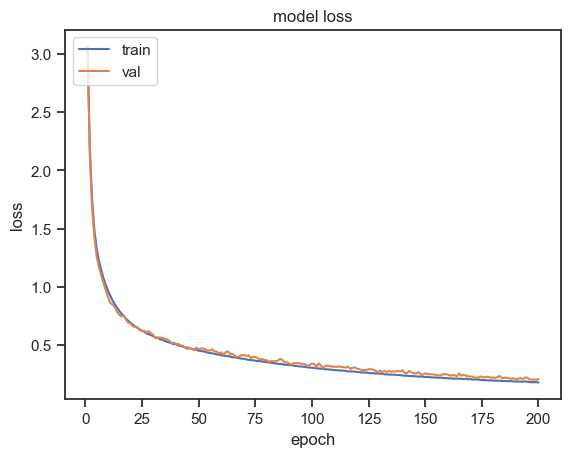

In [13]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 57ms/step - loss: 0.2085 - accuracy: 0.9667

 테스트 정확도: 0.9667
